# Implementing the Gradient Descent Algorithm

In this lab, we'll implement the basic functions of the Gradient Descent algorithm to find the boundary in a small dataset. First, we'll start with some functions that will help us plot and visualize the data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

## Reading and plotting the data like in the figure

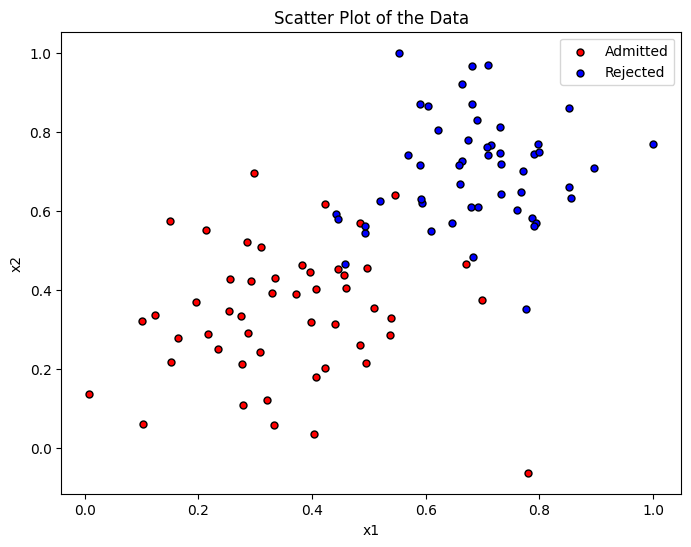

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Load the dataset
data = pd.read_csv('data.csv', header=None, names=['x1', 'x2', 'y'])

# Extract features and targets
features = data[['x1', 'x2']].values
targets = data['y'].values

# Generate the plot
plt.figure(figsize=(8, 6))
plot_points(data)
plt.title("Scatter Plot of the Data")
plt.show()

## TODO: Implementing the basic functions
Here is your turn to shine. Implement the following formulas, as explained in the text.
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [10]:
# Implement the following functions

# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Output (prediction) formula
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

# Error (log-loss) formula
def error_formula(y, output):
    return -y * np.log(output) - (1 - y) * np.log(1 - output)

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    error = y - output
    weights += learnrate * error * x
    bias += learnrate * error
    return weights, bias


## Training function
This function will help us iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.


========== Epoch 0 ==========
Train loss:  0.6336693796866029
Accuracy:  0.51

========== Epoch 100 ==========
Train loss:  0.31198079717757904
Accuracy:  0.93

========== Epoch 200 ==========
Train loss:  0.2405515613315594
Accuracy:  0.94

========== Epoch 300 ==========
Train loss:  0.20931828851189485
Accuracy:  0.93

========== Epoch 400 ==========
Train loss:  0.19171421279471162
Accuracy:  0.93

========== Epoch 500 ==========
Train loss:  0.18039499745472512
Accuracy:  0.91

========== Epoch 600 ==========
Train loss:  0.17250542180583847
Accuracy:  0.91

========== Epoch 700 ==========
Train loss:  0.16669813798915173
Accuracy:  0.91

========== Epoch 800 ==========
Train loss:  0.16225199222696152
Accuracy:  0.92

========== Epoch 900 ==========
Train loss:  0.15874514042924437
Accuracy:  0.92


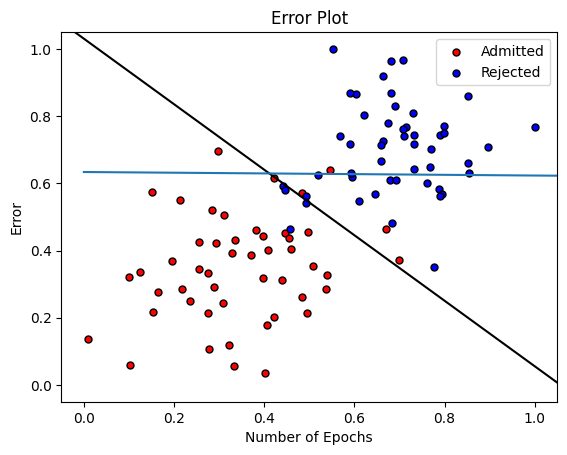

In [11]:
epochs = 1000
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**0.5, size=n_features)
    bias = 0

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = y - output
            weights, bias = update_weights(x, y, weights, bias, learnrate)

        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)

        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e, "==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, " WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss

            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)

            if graph_lines and e % (epochs / 10) == 0:
                display(-weights[0]/weights[1], -bias/weights[1])

    return weights, bias, errors

# Train the model
final_weights, final_bias, errors = train(features, targets, epochs, learnrate)

# Plotting the solution boundary
plt.title("Solution Boundary")
display(-final_weights[0]/final_weights[1], -final_bias/final_weights[1], 'black')

# Plotting the data
plot_points(data)

# Plotting the error
plt.title("Error Plot")
plt.xlabel("Number of Epochs")
plt.ylabel("Error")
plt.plot(errors)
plt.show()


## Time to train the algorithm!
When we run the function, we'll obtain the following:
- 10 updates with the current training loss and accuracy
- A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.
- A plot of the error function. Notice how it decreases as we go through more epochs.

In [14]:
# Plot the decision boundary
def plot_decision_boundary(weights, bias, features, targets):
    plt.title("Decision Boundary")
    x_values = [min(features[:, 0]), max(features[:, 0])]
    y_values = -(weights[0] * np.array(x_values) + bias) / weights[1]
    plt.plot(x_values, y_values, color='black', label='Decision Boundary')

    # Plot data points
    for x, y in zip(features, targets):
        plt.scatter(x[0], x[1], c='red' if y == 1 else 'blue', edgecolor='k')

    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend(["Decision Boundary"])
    plt.show()

## Do the same process for other activation functions

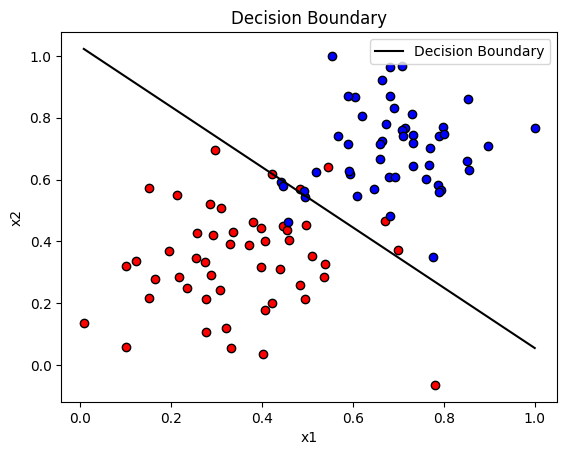

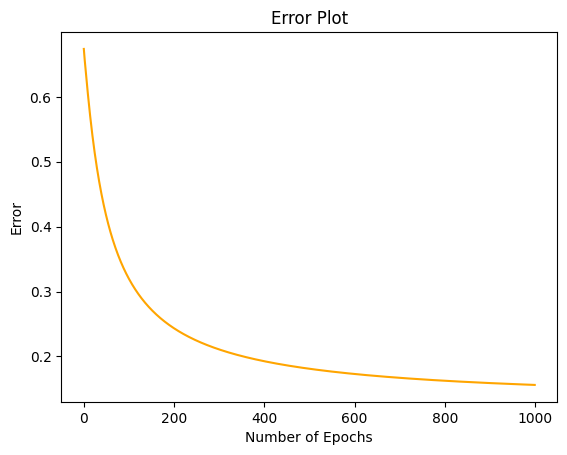

In [15]:
# Call the function to plot the decision boundary
plot_decision_boundary(final_weights, final_bias, features, targets)

# Plot the error over epochs
plt.title("Error Plot")
plt.xlabel("Number of Epochs")
plt.ylabel("Error")
plt.plot(errors, color='orange')
plt.show()